In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline


The datasets are compilations of grocery items' monthly average prices in urban areas of the United States. 

There were some empty data points with each of the CSV files that I was working with, but they have been edited to make 
sure that any empty values were filled or removed accordingly. There were six CSV files combined into one CSV file 
containing all of the columns of average grocery items' prices. All data editing and preparation was done prior to
evaluating and/or modeling on any of its contents. 



There are seven columns, one of which is a date consisting of a month and year. 
By default, the day of the month had already been preset to the first day of each month for 300 months, or 25 years. 
The items being compared and run through for modeling are: white bread, ground beef, eggs, whole milk, and bananas. 
Another column, urban_cpi, is the average urban consumer price index (CPI) for spending on groceries in urban US areas. 

In [2]:
groceries_df = pd.read_csv("fred_groceries_021999_022024.csv", encoding='utf-8')
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         301 non-null    object 
 1   white_bread  301 non-null    float64
 2   ground_beef  301 non-null    float64
 3   egg          301 non-null    float64
 4   whole_milk   301 non-null    float64
 5   banana       301 non-null    float64
 6   urban_cpi    301 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


In [3]:
groceries_df.describe()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1.297900,2.999774,1.651575,3.289449,0.561970,227.267920
std,0.258624,1.078457,0.579640,0.392196,0.049593,42.223027
min,0.878000,0.000000,0.838000,2.656000,0.469000,163.300000
25%,1.046000,2.196000,1.257000,2.964000,0.509000,190.400000
50%,1.358000,2.818000,1.599000,3.241000,0.574000,229.554000
75%,1.419000,3.841000,1.920000,3.557000,0.601000,251.238000
max,2.033000,5.353000,4.823000,4.218000,0.643000,327.731000


In [4]:
# Perform single linear regresssion on each of the columns 
# with respect to Average Urban Consumer Price Index in US
# Create X, y variables

X = sm.add_constant(groceries_df)
y = groceries_df['urban_cpi']

# Create train and test data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Get the linear regression model summary 
# using Ordinary Linear Squares (OLS) from statsmodels
lr_model = smf.ols(formula="urban_cpi ~ white_bread", data=X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1705.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.69e-110
Time:                        15:29:57   Log-Likelihood:                -991.25
No. Observations:                 240   AIC:                             1986.
Df Residuals:                     238   BIC:                             1993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.1750      4.895      5.961      0.000      19.533      38.817
white_bread   152.2903      3.688     41.290      0.000     145.024     159.556
==============================================================================
Omnibus:                        8.429   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.079
Skew:                           0.400   Prob(JB):                       0.0176
Kurtosis:                       2.590   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lr_preds = lr_model.predict(X_test)
lr_model.predict(X_test)

223    234.614584
150    253.650872
226    229.589004
296    334.060152
52     175.525946
          ...    
137    236.289777
227    224.258843
26     182.683590
106    224.106553
92     196.237427
Length: 61, dtype: float64

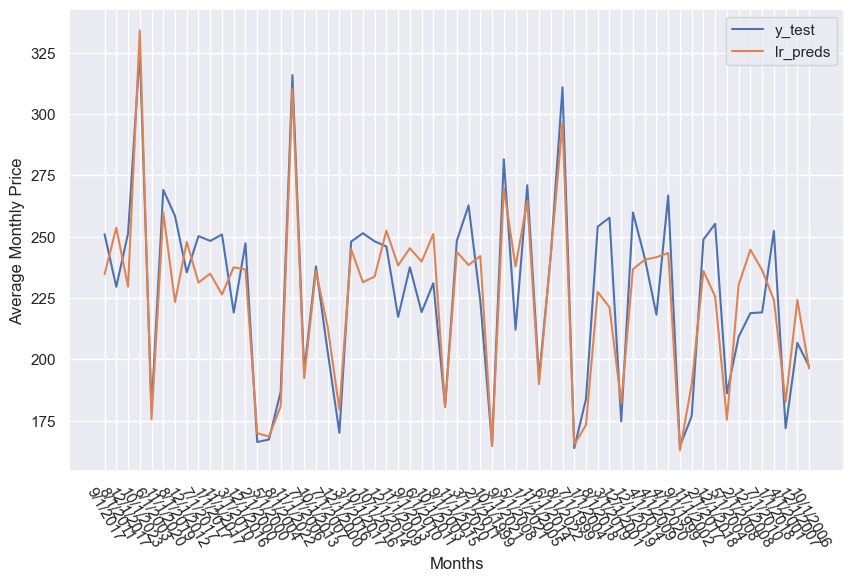

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X_test['DATE'], y_test, label='y_test')
ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
# ax.plot(y_test, lr_preds, label='comparison')
# ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
plt.xlabel("Months")
plt.ylabel("Average Monthly Price")
plt.xticks(rotation=-60, ha='center')
plt.legend()
plt.show()

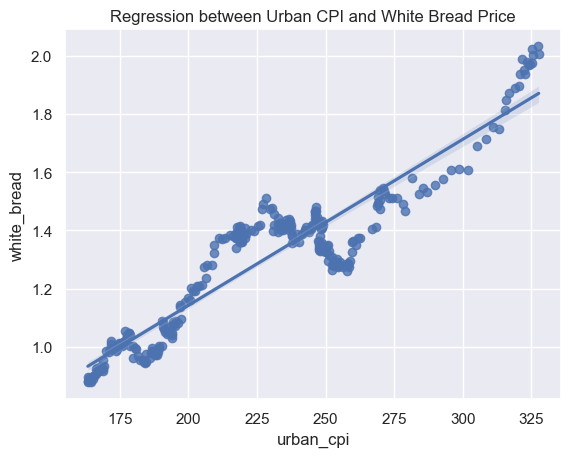

In [8]:
sns.regplot(x='urban_cpi', y='white_bread', data=groceries_df)
plt.title("Regression between Urban CPI and White Bread Price")
plt.show()

In [10]:
# # # Using OLS from sklearn.linear_model for their LinearRegression model
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)

# y_pred_test = regressor.predict(X_test)     # predicted value of y_test
# y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In [ ]:
# # regress "expression" onto "motifScore" (plus an intercept)
# model = sm.OLS(groceries_df.urban_cpi, sm.add_constant(groceries_df.white_bread))
# p = model.fit().params

# # generate x-values for your regression line (two is sufficient)
# x = np.arange(1, 5)

# # scatter-plot data
# ax = groceries_df.plot(x='urban_cpi', y='white_bread', kind='scatter')
# # ax = groc.plot(x='motifScore', y='expression', kind='scatter')

# # plot regression line on the same axes, set x-axis limits
# ax.plot(x, p.const + p.white_bread * x)
# plt.show()
# # ax.set_xlim([1, 2])

In [11]:
lr_model_beef = smf.ols(formula="urban_cpi ~ ground_beef", data=X_train).fit()
lr_model_beef.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2038.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.11e-118
Time:                        16:09:59   Log-Likelihood:                -972.26
No. Observations:                 240   AIC:                             1949.
Df Residuals:                     238   BIC:                             1955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.0974      2.621     44.289      0.000     110.933     121.261
ground_beef    37.0788      0.821     45.144      0.000      35.461      38.697
==============================================================================
Omnibus:                      182.554   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.403
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      23.621   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lr_preds_beef = lr_model_beef.predict(X_test)
lr_preds_beef

223    253.548465
150    220.622491
226    253.585544
296    309.871161
52     187.733596
          ...    
137    207.051651
227    251.101264
26     181.467279
106    198.931394
92     197.893187
Length: 61, dtype: float64

Intercept      6.518869e-117
ground_beef    1.111166e-118
dtype: float64

In [31]:
lr_model_egg = smf.ols(formula="urban_cpi ~ egg", data=X_train).fit()
lr_model_egg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              urban_cpi   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     291.8
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           3.08e-43
Time:                        00:00:47   Log-Likelihood:                -1147.2
No. Observations:                 240   AIC:                             2298.
Df Residuals:                     238   BIC:                             2305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.4136      5.525     25.053      0.000     127.530     149.297
egg           53.4937      3.132     17.081      0.000      47.324      59.663
==============================================================================
Omnibus:                       19.382   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.551
Skew:                           0.748   Prob(JB):                     1.27e-05
Kurtosis:                       2.869   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lr_preds_egg = lr_model_egg.predict(X_test)
lr_preds_egg

223    214.481638
150    229.941320
226    235.504666
296    249.252550
52     202.552540
          ...    
137    215.498018
227    233.043955
26     193.405116
106    250.696880
92     205.655175
Length: 61, dtype: float64

In [ ]:
lr_model = smf.ols(formula="urban_cpi ~ whole_milk", data=X_train).fit()
lr_model.summary()

In [ ]:
lr_preds = lr_model.predict(X_test)
lr_model.predict(X_test)

In [ ]:
lr_model.fittedvalues

In [12]:
dates_test = pd.array(X_train['DATE'])
dates_test

<PandasArray>
[ '4/1/2005',  '1/1/2019',  '6/1/2004',  '8/1/2023', '12/1/2022',  '9/1/2023',
  '8/1/2006',  '7/1/2013',  '3/1/2005', '10/1/2000',
 ...
  '4/1/2019',  '3/1/2022',  '9/1/2016', '11/1/1999',  '5/1/2015',  '1/1/2020',
  '2/1/2015', '11/1/2008',  '1/1/2003',  '6/1/2013']
Length: 240, dtype: object

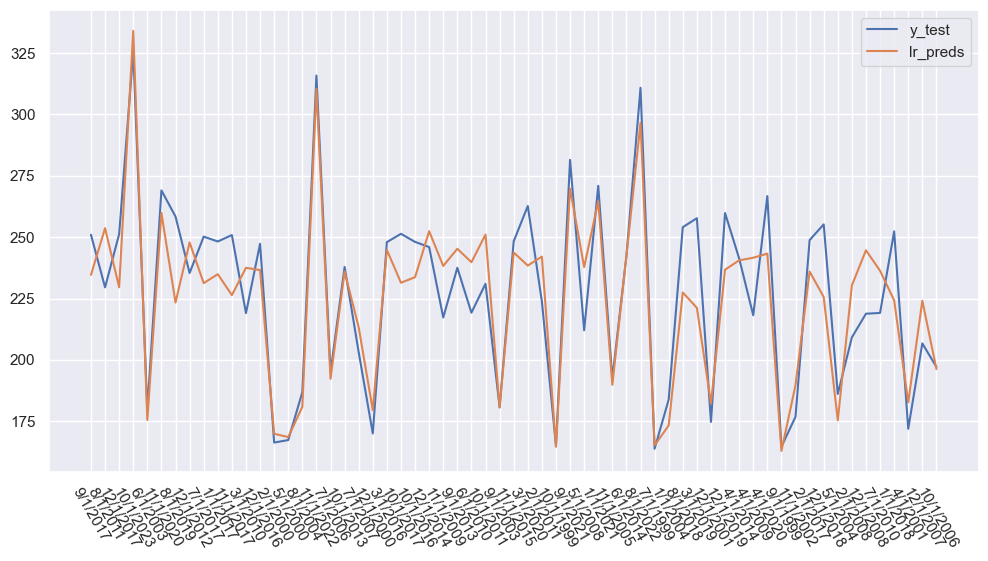

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X_test['DATE'], y_test, label='y_test')
ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
# ax.plot(y_test, lr_preds, label='comparison')
# ax.plot(X_test['DATE'], lr_preds, label='lr_preds')
plt.xticks(rotation=-60, ha='center')
plt.legend()
plt.show()